<a href="https://colab.research.google.com/github/PabloCaSan/Portfolio/blob/main/Proyecto1_CalentamientoGlobal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis exploratorio de datos sobre calentamiento global

## Cargando datos a la libreta

Se analizarán datos de cambio climático descargados desde [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv)   

Esta libreta se hizo con Google Colab, ya que es más fácil importar librerías que Jupyter, así que para acceder a los datos que se usarán se debe conectar con Google Drive

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Una vez que se hizo la conexión, se usa la línea de comandos para navegar hasta la carpeta donde están guardados los datos

In [76]:
%cd /content/drive/MyDrive/Portafolio 
!ls #cd sirve para cambiar de carpeta y ls sirve para ver qué hay dentro de la carpeta

/content/drive/MyDrive/Portafolio
 API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv
 API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv
 API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv
 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv
 API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv
 Casas.csv
 GlobalLandTemperaturesByCountry.csv
 GlobalTemperatures.csv
'Proyecto 1 - Portafolio.ipynb'
'Proyecto 2 - Portafolio.ipynb'
 Tarjetas.csv


Se importan las librerías que se utilizarán

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'1.3.5'

Se cargan los datos y se guarda la línea de código en una variable, para no tener que escribir toda la función a cada rato

In [78]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


En la tabla anterior se observan 5 columnas: 

*   La primera es el número de renglón (índice)
*   La segunda (dt) es la fecha en que se tomó el dato
*   La tercera (AverageTemperature) es la temperatura promedio
*   La cuarta (AverageTemperatureUncertainty) es la incertidumbre o error de medición de la temperaturapromedio
*La quinta (Country) es el país


Es útil saber la cantidad total de colmnas y renglones con que se trabajará

In [79]:
df.shape

(577462, 4)

El resultado anterior dice que hay 577462 renglones y 4 columnas

También es útil saber qué tipo de variables conforman la tabla

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Del resultado anterior se observa que las columnas dt y Country contienen datos tipo texto (object), mientras que AverageTemperature y AverageTemperatureUncertainty tienen datos tipo numérico (float64)

## Explorando y preparando la columna de fecha

Es conveniente convertir la columna dt (fecha) a una variable tipo tiempo

In [81]:
df['year'] = pd.to_datetime(df['dt'])
df['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [82]:
df.info() #Para comprobar que se haya cambiado el tipo de variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   year                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


Se pasó el año a una nueva columna, esta vez con formato tipo tiempo

Se observa que hay datos desde 1743, sin embargo en esas fechas no era tan fácil conseguir datos fiables, así que mejor se usarán los datos para fechas mayores a 1970

In [83]:
filtro = df['year'] > pd.to_datetime('1970-01-01') #Este es un filtro, para considerar fechas mayores al 1 de enero de 1970
df = df[filtro] #Se aplica a la tabla
df #Se muestra la tabla filtrada

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


## Explorando y preparando la columna Country

Seguramente hay más de una medición por país, así que para ver qué países hay en la tabla hay que ver cuántos datos que no se repiten hay en la columna Country

In [84]:
df['Country'].unique() #unique sirve para ver los datos que no se repiten

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

Existe una función para contar cada país de la lista anterior

In [85]:
df['Country'].nunique() #nunique sirve para contar los valores que no se repiten

243

## Explorando y preparando la columna AverageTemperature

Se agrupa por países y años para obtener el promedio y la mediana de la temperatura por año

In [86]:
df_prom = df.groupby(['Country', #Agrupamos por país...
                 pd.Grouper(key='year', freq = '1Y') #...para cada año
]).agg({'AverageTemperature':[np.mean, np.median]}) #Usamos un diccionario para aplicar las funciones de promedio y de mediana a la columna de AverageTemperature
df_prom

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

Una vez que se tiene lo anterior, se pueden analizar los datos para cada país, por ejemplo, para México

In [87]:
df_prom.xs('Mexico')['AverageTemperature']

,mean,median
year,,
1970-12-31,21.036182,21.5130
1971-12-31,20.640333,20.6605
1972-12-31,20.975000,22.1485
1973-12-31,20.496167,20.8200
1974-12-31,20.631500,21.0005
1975-12-31,20.449333,20.9585
1976-12-31,20.145667,20.3740
1977-12-31,20.841250,21.0620
1978-12-31,20.755500,21.2615


Y para tener una mejor idea de su comportamiento, se pueden graficar

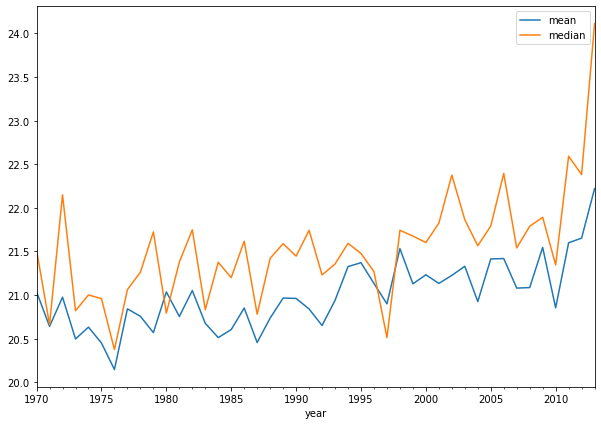

In [88]:
df_prom.xs('Mexico')['AverageTemperature'].plot(figsize=(10,7))

En la gráfica anterior se muestra el año vs el promedio y el año vs la mediana, de la temperatura promedio. El promedio tiene el invonveniente de que se ve afectado si hay datos muy grandes o muy pequeños, para este análisis exploratorio, conviene fijarse en la mediana, ya que lo que se busca es ver cómo ha ido subiendo la temperatura y obtener correlaciones.

## Preparando los datos para usar la mediana

Para tomar solo la mediana hay que hacer una nueva tabla de datos basada en la anterior

In [89]:
df_mediana = df_prom['AverageTemperature'][['median']].reset_index()
df_mediana

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


En la nueva tabla hay que crear una nueva columna para el año, así en vez de tener la fecha completa, solo se tendrá el año

In [90]:
df_mediana['Año'] = df_mediana['year'].dt.year
df_mediana['Año']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: Año, Length: 10692, dtype: int64

También es conveniente cambiar los nombres de las columnas en esta nueva tabla

In [91]:
df_mediana.rename(columns={'median':'Temperatura'}, inplace=True) #inplace sirve para aplicar los cambios diractamente a la tabla sin crear una nueva
df_mediana.rename(columns={'Country':'Pais'}, inplace=True)
df_mediana

,Pais,year,Temperatura,Año
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


## Reduciendo la cantidad de datos para su manejo

Se hará un pivote, es decir se girarará la tabla, para tener en los renglones a los años y en las columnas a los países

In [92]:
df_pivote = df_mediana.pivot_table(values='Temperatura', index='Año', columns='Pais')
df_pivote

Pais,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
Año,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7550,26.4965,26.4465,23.8720,26.255

La tabla pivoteada permite analizar mejor la temperatura de cada país por año. Se puede intentar graficar, pero se verán demasiados datos y será difícil de leer, así que es mejor reducirlos. Para lograr lo anterior se usa una muestra (sample) aleatoria

In [93]:
df_pivote.sample(2)

Pais,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
Año,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1986,15.1815,25.173,13.372,23.547,27.1245,10.990,22.8715,26.844,26.6995,15.5155,10.5700,28.0475,8.613,22.258,7.1915,12.4225,26.0135,27.474,25.6205,26.5340,26.9460,6.840,9.724,25.5525,26.7085,11.8370,22.062,27.6100,11.386,23.3250,25.3650,26.468,11.4375,28.0790,24.7745,20.144,27.042,24.1695,-4.8195,23.9395,...,22.5275,1.5435,12.2235,12.7690,27.5600,28.456,26.3520,-7.993,19.8690,2.254,7.0035,19.7205,22.6770,5.5895,22.9225,26.811,26.4585,26.5650,22.8320,26.3620,20.4205,12.823,15.7825,26.9835,23.496,9.0475,28.7965,8.5325,8.6855,9.0425,17.937,13.3115,25.1655,24.6800,26.468,22.1385,26.2835,22.276,22.4890,6.4775
2001,16.3620,25.803,13.749,25.324,27.2835,12.674,22.8960,27.574,27.5020,15.4380,10.2705,29.0125,9.121,21.818,7.7940,12.3055,24.9745,28.242,26.0725,27.2915,27.4825,8.785,10.803,26.1480,27.4790,13.1535,22.035,28.3935,11.867,23.3015,25.8505,27.143,11.8270,28.0125,25.3875,20.621,27.351,24.5315,-3.6760,25.2865,...,22.9255,2.6030,14.1725,14.4395,28.0995,28.830,26.8305,-8.547,20.3675,3.302,7.8850,19.6980,22.9645,6.5665,22.9440,27.168,26.4715,27.3055,24.1455,27.1865,21.9790,12.892,16.4005,26.6725,23.378,9.8855,29.4600,9.4945,9.6605,9.4300,18.256,13.8655,25.7300,25.3055,27.143,23.2355,28.0270,22.186,22.7205,5.6560


El resultado anterior muestra dos años aleatorios dentro de la tabla, pero es más útil moestrar países aleatorios en vez de años, para ello se usa la transpuesta de la tabla

In [94]:
df_pivote.T.sample(2).T # T sirve para hacer la transpuesta de la tabla

Pais,Laos,Indonesia
Año,,
1970,25.2840,26.1490
1971,24.2690,25.7500
1972,24.6520,25.9685
1973,25.0160,26.2735
1974,24.4885,25.9225
1975,24.9865,25.8930
1976,24.8675,25.8055
1977,24.8665,25.9475
1978,24.6100,25.9815


Ahora sí se pueden graficar los datos

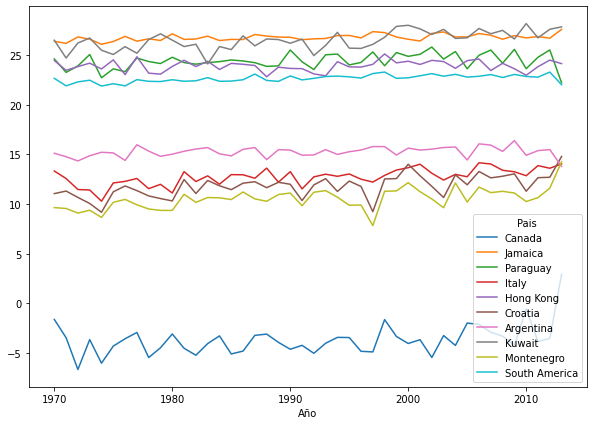

In [95]:
df_pivote.T.sample(10).T.plot(figsize=(10,7))

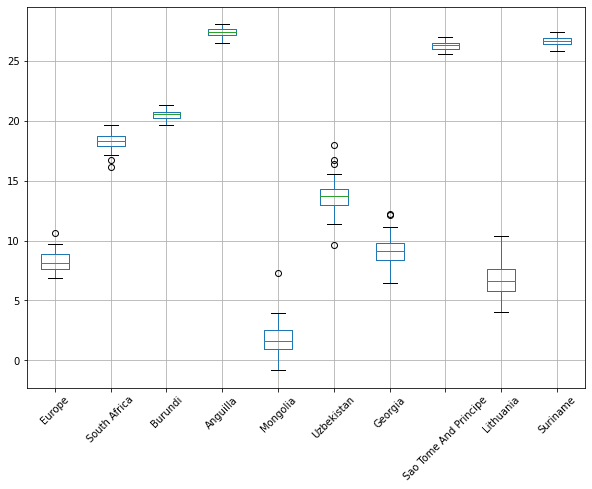

In [96]:
df_pivote.T.sample(10).T.boxplot(figsize=(10,7), rot=45)

De las gráficas anteriores se puede observar que los datos de la temperatura son muy desiguales entre países, esto se debe a que la temperatura varía dependiendo de la latitud

## Añadiendo tablas de datos externas

Para obtener una mayor información sobre el calentamiento global, hay que importar más datos. La página del [Banco Mundial](https://data.worldbank.org/topic/climate-change) tiene información relevante. Se importarán datos del área de agricultura por año, el área de bosques por año, el uso de electricidad, la cantidad de CO2 y la población

In [97]:
df_agricultura = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv', header = 2)
df_bosques = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv', header = 2)
df_electricidad = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv', header = 2)
df_co2 = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv', header = 2)
df_poblacion = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv', header = 2)

Hay que ver cómo están compuestas las tablas

In [98]:
df_agricultura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            227 non-null    float64
 6   1962            227 non-null    float64
 7   1963            227 non-null    float64
 8   1964            227 non-null    float64
 9   1965            227 non-null    float64
 10  1966            227 non-null    float64
 11  1967            227 non-null    float64
 12  1968            227 non-null    float64
 13  1969            227 non-null    float64
 14  1970            227 non-null    float64
 15  1971            227 non-null    float64
 16  1972            227 non-null    float64
 17  1973            227 non-null    flo

Al hacer una exploración de los datos, se observa que las columnas son: los años, el nombre del país (Country Name), el código del país (Country Code), el nombre del indicador (Indicator Name) el código del indicador (Indicator Code) y una columna sin nombre. Resultarán relevantes las columnas del nombre del país y del código del país, ya que en teoría deberían ser iguales en las tablas importadas anteriormente

Y los años de estas tablas van desde 1960 hasta 2020, pero para que tengan relación con los datos de la tabla de temperatura, se seleccionarán solo los datos comprendidos entre 1970 y 2013

In [99]:
range(1970,2014) #Se elige 2014 porque se toman los datos menores a 2014
map(str,range(1970,2014)) #Para mapear entre tipos de variables
cols = ['Country Name', 'Country Code'] + list(map(str,range(1970,2014))) #Se eligen las columnas relevantes
cols[:5] #Se muestran las primeras 5 columnas

['Country Name', 'Country Code', '1970', '1971', '1972']

In [100]:
df_agricultura.loc[:,cols] #Se elige una tabla de las que se importaron y se muestran las columnas elegidas anteriormente

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00
1,Africa Eastern and Southern,AFE,5344800.0,5360170.0,5365870.0,5366130.0,5367810.0,5371960.0,5374560.0,5374970.0,5385870.0,5381690.0,5380330.0,5391340.0,5391740.0,5396020.0,5395980.0,5417560.0,5425200.0,5428670.0,5434450.0,5445460.0,5313659.9,5207436.27,5224490.44,5057484.61,5072408.78,5083992.95,5097517.12,5117281.39,5135205.56,5164119.73,5185183.9,5200494.37,5215366.84,5243793.31,5279228.58,5294720.25,5309259.72,5324692.99,5356256.56,5380079.83,5398501.8,6392500.50,6459157.24,6477782.40
2,Afghanistan,AFG,380060.0,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,380490.0,380490.0,380530.0,380540.0,380540.0,380540.0,380540.0,380540.0,380450.0,380400.0,380400.0,380400.0,380300.00,380300.00,379340.00,378130.00,377530.00,377520.00,377900.00,378670.00,377530.00,377530.0,377530.00,377530.00,379100.00,379110.00,379100.00,379100.00,379100.00,379100.00,379100.00,379110.0,379100.00,379100.00,379100.00
3,Africa Western and Central,AFW,3117394.7,3102665.6,3060380.0,3111330.0,3064870.0,3060690.0,3066700.0,3023890.0,3013030.0,3011030.0,3042130.0,3008140.0,3026200.0,3037840.0,3080760.0,3109950.0,3169070.0,3171470.0,3188410.0,3195000.0,3187523.8,3207365.62,3226179.84,3247322.31,3266364.08,3315053.90,3303797.52,3322659.24,3325963.56,3345190.93,3355358.3,3384939.88,3396241.86,3423124.14,3419379.60,3480862.45,3481821.00,3497969.35,3524364.40,3536365.75,3551895.8,3559485.78,3574436.40,3594810.30
4,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574040.0,455626.37,457180.54,458734.71,460288.88,461843.05,463397.22,464951.39,466505.56,468059.73,469613.9,475164.51,480715.12,486265.73,491816.34,497366.95,502917.56,508468.17,514018.78,519569.39,525120.0,530670.62,536221.24,541771.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.00,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,234180.0,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,234630.0,234630.0,234650.0,234650.0,234650.0,234650.0,234700.0,234700.0,234790.0,234790.0,234810.0,236260.0,236310.00,234810.00,237250.00,237300.00,237360.00,237550.00,237200.00,236800.00,236680.00,236690.0,235950.00,236560.00,234950.00,235570.00,235230.00,236270.00,236270.00,235170.00,234520.00,235790.0,234520.00,235010.00,234990.00
263,South Africa,ZAF,955900.0,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,942100.0,941600.0,941000.0,940330.0,940330.0,940330.0,940330.0,944000.0,946500.0,949000.0,953000.0,956000.0,960050.00,964730.00,969360.00,972650.00,975200.00,978900.00,979450.00,979880.00,980580.00,981250.0,980130.00,980280.00,979280.00,976080.00,974830.00,968880.00,968900.00,971080.00,969880.00,968910.0,963740.00,963410.00,963410.00
264,Zambia,ZMB,198740.0,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,197800.0,198460.0,198360.0,198080.0,199610.0,199820.0,201250.0,202250.0,203660.0,205290.0,208970.0,208110.0,208260.00,210650.00,212020.00,214730.00,214580.00,218650.00,219710.00,220250.00,224050.00,224980.0,225550.00,226160.00,229090.00,228970.00,227620.00,230480.00,229840.00,230870.00,235

Ahora se unirá la tabla anterior usando las columnas Country Name y Country Code

## Uniendo las tablas nuevas con la primera

In [101]:
df_agricultura.loc[:,cols].melt(id_vars=['Country Name', 'Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1970,20.0
1,Africa Eastern and Southern,AFE,1970,5344800.0
2,Afghanistan,AFG,1970,380060.0
3,Africa Western and Central,AFW,1970,3117394.7
4,Angola,AGO,1970,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2013,NaN
11700,"Yemen, Rep.",YEM,2013,234990.0
11701,South Africa,ZAF,2013,963410.0
11702,Zambia,ZMB,2013,237360.0


Ahora los años que antes eran varias columnas, forman parte de una solo columna

Es útil renombrar las columnas

In [102]:
df_agricultura.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={'variable':'Año',
             'Country Name':'Pais',
             'Country Code':'Nombre',
             'value':'Agricultura'}
)

,Pais,Nombre,Año,Agricultura
0,Aruba,ABW,1970,20.0
1,Africa Eastern and Southern,AFE,1970,5344800.0
2,Afghanistan,AFG,1970,380060.0
3,Africa Western and Central,AFW,1970,3117394.7
4,Angola,AGO,1970,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2013,NaN
11700,"Yemen, Rep.",YEM,2013,234990.0
11701,South Africa,ZAF,2013,963410.0
11702,Zambia,ZMB,2013,237360.0


Hay que hacer lo anterior para cada tabla, entonces es mejor crear una función y así reducir un poco el trabajo

In [103]:
def fun_formato(df, col='Agricultura'):
  return df.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
    columns={'variable':'Año',
             'Country Name':'Pais',
             'Country Code':'Nombre',
             'value':col})

In [104]:
df_agricultura = fun_formato(df_agricultura, col='Agricultura')
df_bosques = fun_formato(df_bosques, col='Bosques')
df_electricidad = fun_formato(df_electricidad, col='Electricidad')
df_co2 = fun_formato(df_co2, col='CO2')
df_poblacion = fun_formato(df_poblacion, col='Poblacion')

Para ver los cambios se abre alguna de las tablas anteriores

In [105]:
df_poblacion

,Pais,Nombre,Año,Poblacion
0,Aruba,ABW,1970,59070.0
1,Africa Eastern and Southern,AFE,1970,170257189.0
2,Afghanistan,AFG,1970,11173654.0
3,Africa Western and Central,AFW,1970,120269044.0
4,Angola,AGO,1970,5890360.0
...,...,...,...,...
11699,Kosovo,XKX,2013,1818117.0
11700,"Yemen, Rep.",YEM,2013,25147112.0
11701,South Africa,ZAF,2013,53687125.0
11702,Zambia,ZMB,2013,14926551.0


In [106]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pais       11704 non-null  object 
 1   Nombre     11704 non-null  object 
 2   Año        11704 non-null  object 
 3   Poblacion  11635 non-null  float64
dtypes: float64(1), object(3)
memory usage: 365.9+ KB


Se unirá la tabla de la población con la de la temperatura, pero antes hay que convertir las variables de año a tipo numérico, ya que al hacer los cambios anteriores, pasó de ser tipo numérico (float64) a ser de tipo texto (object)

In [107]:
df_poblacion['Año'] = df_poblacion['Año'].astype(float)
df_agricultura['Año'] = df_agricultura['Año'].astype(float)
df_bosques['Año'] = df_bosques['Año'].astype(float)
df_co2['Año'] = df_co2['Año'].astype(float)
df_electricidad['Año'] = df_electricidad['Año'].astype(float)

Ahora sí se pueden unir, se usarán las columnas País, Temperatura y Año, que las tablas tienen en común, y la unión será de tipo intersección (inner)

In [109]:
df_union = pd.merge(df_mediana[['Pais',	'Temperatura',	'Año']],
                    df_poblacion, on=['Pais','Año'], how='inner')
df_union

,Pais,Temperatura,Año,Nombre,Poblacion
0,Afghanistan,16.1990,1970,AFG,11173654.0
1,Afghanistan,14.9340,1971,AFG,11475450.0
2,Afghanistan,13.8725,1972,AFG,11791222.0
3,Afghanistan,14.9130,1973,AFG,12108963.0
4,Afghanistan,13.6160,1974,AFG,12412960.0
...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,12526964.0
7388,Zimbabwe,23.3040,2010,ZWE,12697728.0
7389,Zimbabwe,22.9420,2011,ZWE,12894323.0
7390,Zimbabwe,23.0455,2012,ZWE,13115149.0


Se repetirá lo anterior para el resto de tablas

In [110]:
df_union = pd.merge(df_union,
                    df_co2,
                    on=['Pais','Nombre','Año'],
                    how='inner')
df_union = pd.merge(df_union,
                    df_electricidad,
                    on=['Pais','Nombre','Año'],
                    how='inner')
df_union = pd.merge(df_union,
                    df_agricultura,
                    on=['Pais','Nombre','Año'],
                    how='inner')
df_union = pd.merge(df_union,
                    df_bosques,
                    on=['Pais','Nombre','Año'],
                    how='inner')

#Estos cambios tendrán efecto diractamente en la tabla df_union, pues se añadirán columnas

In [111]:
df_union

,Pais,Temperatura,Año,Nombre,Poblacion,CO2,Electricidad,Agricultura,Bosques
0,Afghanistan,16.1990,1970,AFG,11173654.0,1672.152,NaN,380060.0,NaN
1,Afghanistan,14.9340,1971,AFG,11475450.0,1895.839,NaN,380360.0,NaN
2,Afghanistan,13.8725,1972,AFG,11791222.0,1532.806,NaN,380460.0,NaN
3,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
4,Afghanistan,13.6160,1974,AFG,12412960.0,1917.841,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.000,585.457099,163000.0,179513.5
7388,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.000,606.643960,162000.0,179052.8
7389,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.000,636.248991,164000.0,178592.1
7390,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.000,608.761669,162000.0,178131.4


Observando los datos iniciales de Electricidad y Bosques, se observa que hay datos NaN (Not a Number), es decir que son datos vacíos. Es conveniente desecharlos

## Limpiando datos

In [112]:
df_union.dropna()

,Pais,Temperatura,Año,Nombre,Poblacion,CO2,Electricidad,Agricultura,Bosques
64,Albania,13.4490,1990,ALB,3286542.0,6050.0,552.252185,11210.0,7888.0
65,Albania,11.5885,1991,ALB,3266790.0,4110.0,418.453589,11270.0,7868.5
66,Albania,13.5850,1992,ALB,3247039.0,2240.0,453.644074,11270.0,7849.0
67,Albania,13.6500,1993,ALB,3227287.0,2070.0,536.363825,11260.0,7829.5
68,Albania,13.2390,1994,ALB,3207536.0,2140.0,596.407959,11260.0,7810.0
...,...,...,...,...,...,...,...,...,...
7387,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.0,585.457099,163000.0,179513.5
7388,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.0,606.643960,162000.0,179052.8
7389,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.0,636.248991,164000.0,178592.1
7390,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.0,608.761669,162000.0,178131.4


La tabla df_union se ha limpiado, es conveniente guardar esta tabla limpia en una variable para no tener que repetir la función dropna() cada que se quieran utilizar esos datos

In [113]:
df_CalentamientoGlobal = df_union.dropna()

Una opción para empezar a analizar datos es ordenarlos de forma ascendente o descendente, de esta manera se puede ver qué países son los que más contaminan y cuales son los que menos contaminan. Se ordenarán los países, de acuerdo a la mediana de su producción de CO2, de forma descendente

In [116]:
df_CalentamientoGlobal.groupby('Pais')['CO2'].median().sort_values(ascending=False) # sort_values sirve para ordenar los datos de mayor a menor o viceversa

Pais
North America    5.979791e+06
United States    5.470430e+06
China            3.667540e+06
Japan            1.173390e+06
India            9.707050e+05
                     ...     
Suriname         1.500000e+03
Mozambique       1.500000e+03
Togo             1.430000e+03
Niger            8.050000e+02
Eritrea          6.400000e+02
Name: CO2, Length: 120, dtype: float64

Al observar los datos se ve que están en notación científica y eso complica un poco su lectura, para tener una mayor claridad, se quitará la notación científica. Esto no siempre es conveniente, especialmente cuando se quieren hacer operaciones con los datos, sin embargo en este caso solo se busca hacer un análisis exploratorio

In [121]:
pd.set_option('display.float_format', '{:,.1f}'.format) #De esta manera se quita la notación científica y se convierte a notación decimal con una cifra después del punto

In [120]:
df_CalentamientoGlobal.groupby('Pais')['CO2'].median().sort_values(ascending=False) #Nuevamente se ordenan los países

Pais
North America   5,979,791.3
United States   5,470,430.0
China           3,667,540.0
Japan           1,173,390.0
India             970,705.0
                    ...    
Suriname            1,500.0
Mozambique          1,500.0
Togo                1,430.0
Niger                 805.0
Eritrea               640.0
Name: CO2, Length: 120, dtype: float64

Para tener una mejor idea, se grafican los 10 primeros países de la lista anterior. Para ello se crea una variable que contenga los nombres de los 10 primeros países de la lista

In [123]:
primeros_10 = df_CalentamientoGlobal.groupby('Pais')['CO2'].median().sort_values(ascending=False).head(10).index # head(10) sirve para elegir los 10 primeros datos
primeros_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Pais')

Con los datos de la variable anterior, se crea una nueva tabla, derivada de df_CalentamientoGlobal y limitada por los 10 primeros países

In [125]:
df_MayorCO2 = df_CalentamientoGlobal[df_CalentamientoGlobal['Pais'].isin(primeros_10)]
df_MayorCO2

,Pais,Temperatura,Año,Nombre,Poblacion,CO2,Electricidad,Agricultura,Bosques
1296,Canada,-4.6,1990,CAN,"27,691,138.0","419,120.0","16,167.4","614,030.0","3,482,729.3"
1297,Canada,-4.2,1991,CAN,"28,037,420.0","412,930.0","16,181.6","615,332.5","3,482,258.3"
1298,Canada,-5.0,1992,CAN,"28,371,264.0","426,000.0","16,164.4","614,650.0","3,481,787.4"
1299,Canada,-4.0,1993,CAN,"28,684,764.0","422,680.0","16,320.1","613,970.0","3,481,316.4"
1300,Canada,-3.4,1994,CAN,"29,000,663.0","438,820.0","16,388.3","613,290.0","3,480,845.5"
...,...,...,...,...,...,...,...,...,...
7167,United States,8.4,2009,USA,"306,771,529.0","5,159,550.0","12,913.7","4,089,470.0","3,082,016.0"
7168,United States,10.2,2010,USA,"309,327,143.0","5,392,870.0","13,394.9","4,069,917.0","3,087,200.0"
7169,United States,9.5,2011,USA,"311,583,481.0","5,172,100.0","13,245.9","4,050,364.0","3,089,950.0"
7170,United States,9.9,2012,USA,"313,877,662.0","4,950,210.0","12,964.2","4,030,810.5","3,092,700.0"


## Graficando los datos para buscar información

Se grafica la tabla anterior en un diagrama de dispersión tomando en el eje x a la población, y en el eje y a la cantidad de CO2, el año se mostrará en colores

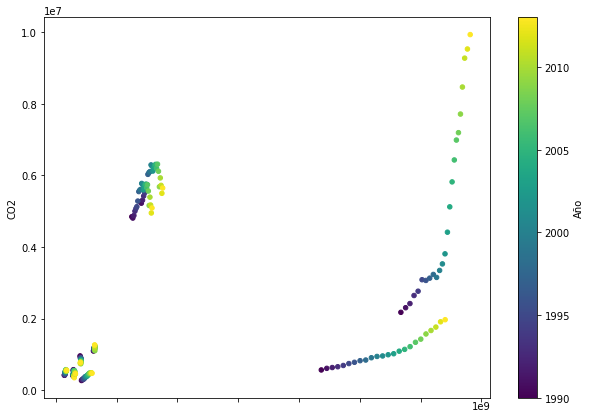

In [128]:
df_MayorCO2.set_index('Pais').plot.scatter(
    x='Poblacion',
    y='CO2',
    c='Año',
    colormap='viridis',
    figsize=(10,7)
)

La parte derecha de la gráfica anterior muestra indicios de que podría haber una correlación entre el crecimiento de la población y la cantidad de CO2 que producen los países, esto se explorará más a fondo y se determinará si dicha correlación existe

In [129]:
df_CalentamientoGlobal.corr() # Esta función muestra valores de 0 a 1 dependiendo de qué tan correlacionadas están las variables
# Los valores de -1 a 0 son para correlaciones inversas

,Temperatura,Año,Poblacion,CO2,Electricidad,Agricultura,Bosques
Temperatura,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
Año,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
Poblacion,-0.0,0.0,1.0,0.6,-0.1,0.6,0.4
CO2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
Electricidad,-0.4,0.1,-0.1,0.2,1.0,0.1,0.2
Agricultura,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
Bosques,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


Se empiezan a vislumbrar correlaciones:

*   Población - CO2
*   Población - Agricultura
*   Agricultura - CO2
*   Bosques - CO2

Para observar mejor lo que pasa, se hará un mapa de calor

In [130]:
import seaborn as sns #Los mapas de calor se encuentran en la librería seaborn

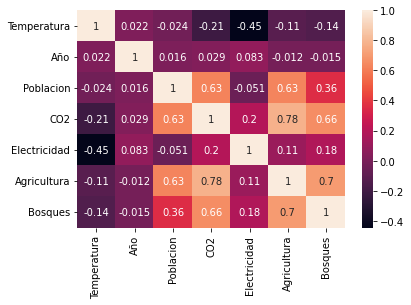

In [133]:
sns.heatmap(df_CalentamientoGlobal.corr(), annot=True) #annot sirve para mostrar los valores

Se observan las siguientes correlaciones:


*   La producción de CO2 con la población
*   El área de agricultura con la población
*   La producción de CO2 con el área de agricultura
*   El área de bosques con el área de agricultura


Curiosamente, no se ve una correlación entre la temperatura y el año. Esto seguramente se debe a se están considerando muchos países, y las temperaturas son diferentes para cada uno de ellos

## Graficando para obtener conclusiones

Se analizarán los datos como un solo planeta, es decir, sin hacer distinciones entre países, esto debido a lo anterior. Además se tomará la mediana de los datos. Para ello se hará una nueva variable

In [135]:
df_planeta = df_CalentamientoGlobal.groupby('Año').median()
df_planeta

,Temperatura,Poblacion,CO2,Electricidad,Agricultura,Bosques
Año,,,,,,
1990,22.7,"10,230,931.0","29,250.0","1,157.4","91,700.0","63,710.0"
1991,22.4,"10,346,663.5","27,345.0","1,072.5","91,870.0","63,349.1"
1992,19.9,"9,748,274.5","24,085.0","1,451.8","89,700.0","46,809.8"
1993,20.6,"9,877,647.0","24,080.0","1,520.3","83,965.0","45,837.1"
1994,20.5,"10,014,523.5","25,515.0","1,582.7","85,220.0","45,468.5"
1995,20.0,"10,081,493.5","27,300.0","1,606.4","77,575.0","44,901.8"
1996,19.9,"10,110,291.0","28,315.0","1,707.6","78,345.0","44,265.8"
1997,20.2,"10,113,205.0","28,945.0","1,782.6","79,280.0","43,629.8"
1998,21.2,"10,116,079.5","28,965.0","1,807.8","80,410.0","42,993.8"


Se grafica la tabla anterior en un mapa de calor

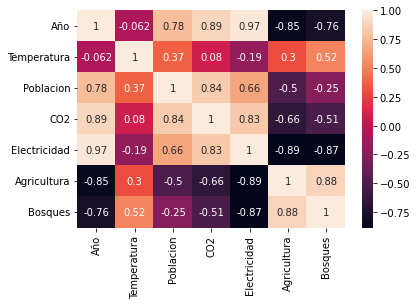

In [136]:
sns.heatmap(df_planeta.reset_index().corr(),annot=True)

Esta vez se observan las siguientes correlaciones:

*   La producción de CO2 aumenta con el año 
*   La producción eléctrica aumenta con el año
*   El crecimiento de la población aumenta con el año
*   La producción de CO2 aumenta con la población 
*   La producción de CO2 aumenta con la producción eléctrica
*   El área de bosques disminuye mientras aumenta el año
*   El área de agricultura disminuye mientras aumenta el año
*   El área de agricultura disminuye junto con el área de bosques

Las correlaciones también se pueden ver haciendo un diagrama de dispersión, así además de ver qué variables están correlacionadas entre sí, se puede ver cómo es su distribución

In [139]:
from pandas.plotting import scatter_matrix #Se importa la matriz de dispersión

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd66b754e90>,
      dtype=object)

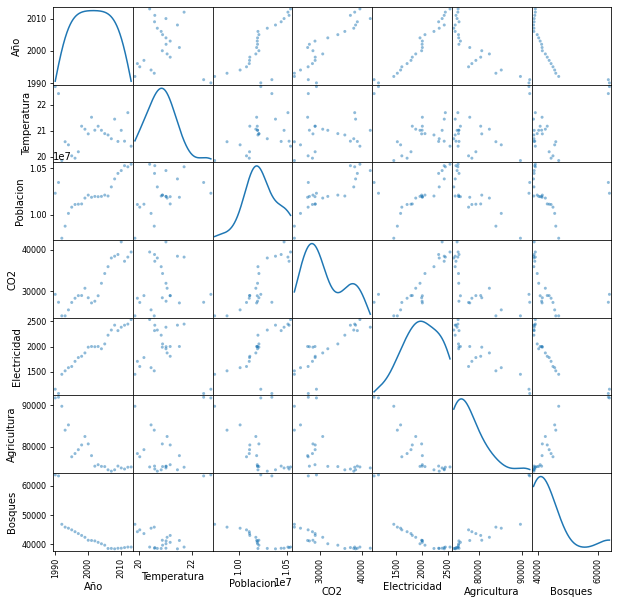

In [140]:
scatter_matrix(df_planeta.reset_index(),diagonal='kde', figsize=(10,10))

También resulta interesante comparar variables entre países, para ello se usann los gráficos de coordenadas paralelas

In [141]:
from pandas.plotting import parallel_coordinates #Se importan los gráficos de coordenadas paralelas

Es interesante ver cómo se comparan los primeros 4 mayores productores de CO2

In [148]:
primeros_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Pais')

In [153]:
df_ComparacionPrimeros4 = df_CalentamientoGlobal[
  df_CalentamientoGlobal['Pais'].isin(['United States',
    'China',
    'Japan',
    'India'
  ])
][['Pais',
   'Temperatura',
   'CO2',
   'Agricultura',
   'Bosques',
   'Electricidad']]

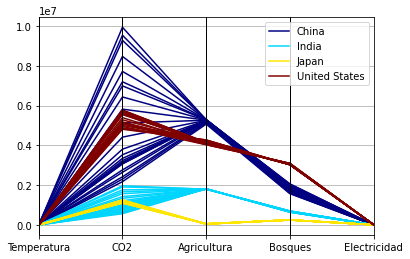

In [156]:
parallel_coordinates(df_ComparacionPrimeros4, 'Pais', colormap='jet') #colormap sirve para cambiar el esquema de colores

Se observa que China es el país que produce más CO2, tiene menos bosques que Estados Unidos, pero tiene más área de agricultura

Hasta ahora se han detectado correlaciones entre diferentes variables, pero falta ver si efectivamente la temperatura ha aumentado a lo largo de los años. Para ello es mejor hacer el análisis por país, se eligirá a México, Estados Unidos y China.

In [173]:
df_CalentamientoMexico = df_CalentamientoGlobal.loc[df_CalentamientoGlobal['Pais'] == 'Mexico']
df_CalentamientoEEUU = df_CalentamientoGlobal.loc[df_CalentamientoGlobal['Pais'] == 'United States']
df_CalentamientoChina = df_CalentamientoGlobal.loc[df_CalentamientoGlobal['Pais'] == 'China']

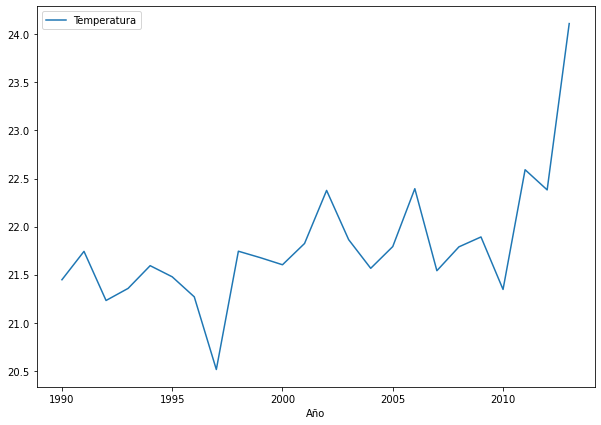

In [179]:
df_CalentamientoMexico.plot(x='Año', y='Temperatura', figsize=(10,7))

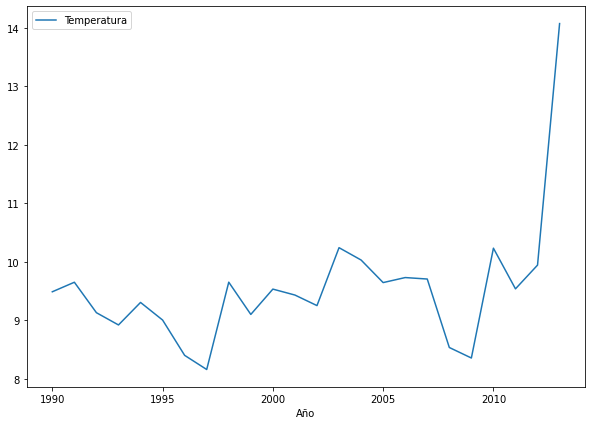

In [180]:
df_CalentamientoEEUU.plot(x='Año', y='Temperatura', figsize=(10,7))

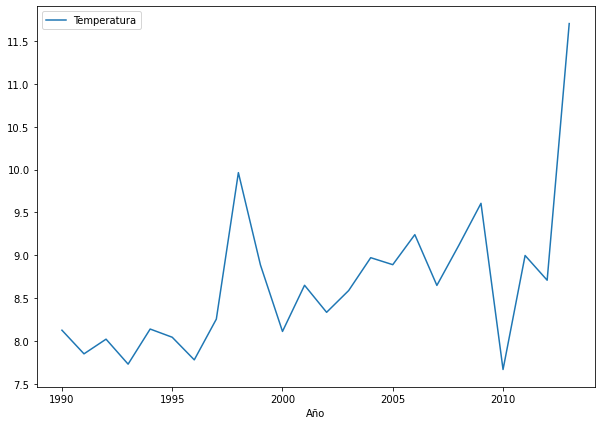

In [181]:
df_CalentamientoChina.plot(x='Año', y='Temperatura', figsize=(10,7))

Se observa que a partir del 2010 hay una tendencia ascendente de la temperatura. Resulta interesnate comparar cómo se relacionan las variables de Año, Población CO2, Electricidad, Área de agricultura y Área de bosques con la Temperatura. Para ello se eligen los datos de China (ya que es el mayor productor de CO2) mayores a 2010.

In [186]:
df_CalentamientoChina2010 = df_CalentamientoChina.loc[df_CalentamientoChina['Año'] >= 2010]
df_CalentamientoChina2010

,Pais,Temperatura,Año,Nombre,Poblacion,CO2,Electricidad,Agricultura,Bosques
1536,China,7.7,2010,CHN,"1,337,705,000.0","8,470,570.0","2,943.6","5,289,168.0","2,006,103.8"
1537,China,9.0,2011,CHN,"1,345,035,000.0","9,278,250.0","3,295.8","5,288,851.0","2,025,471.5"
1538,China,8.7,2012,CHN,"1,354,190,000.0","9,533,210.0","3,466.0","5,287,995.0","2,044,839.3"
1539,China,11.7,2013,CHN,"1,363,240,000.0","9,936,680.0","3,757.2","5,288,015.0","2,064,207.0"


In [187]:
df_CalentamientoChina2010.corr()

,Temperatura,Año,Poblacion,CO2,Electricidad,Agricultura,Bosques
Temperatura,1.0,0.9,0.9,0.9,0.9,-0.7,0.9
Año,0.9,1.0,1.0,1.0,1.0,-0.9,1.0
Poblacion,0.9,1.0,1.0,1.0,1.0,-0.9,1.0
CO2,0.9,1.0,1.0,1.0,1.0,-0.9,1.0
Electricidad,0.9,1.0,1.0,1.0,1.0,-0.9,1.0
Agricultura,-0.7,-0.9,-0.9,-0.9,-0.9,1.0,-0.9
Bosques,0.9,1.0,1.0,1.0,1.0,-0.9,1.0


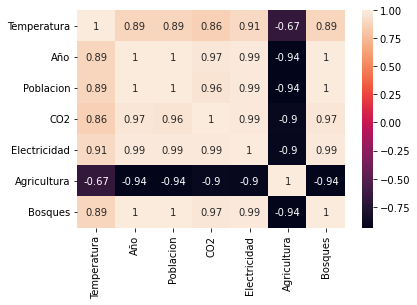

In [189]:
sns.heatmap(df_CalentamientoChina2010.corr(),annot=True)

Ahora se observa una correlación muy estrecha entre:


*   El aumento de la temperatura con paso del tiempo
*   El aumento de la temperatura con el crecimiento de la población
*   El aumento de la temperatura con el aumento del CO2
*   El aumento de la temperatura con el aumento de la producción eléctrica



*   El paso del tiempo con el crecimiento de la población
*   El paso del tiempo con el aumento en la producción de CO2
*   El paso del tiempo con el aumento en la producción de electricidad
*   El paso del tiempo con la disminución del área de agricultura
*   El paso del tiempo con el aumento del área de bosques

*   El crecimiento de la población con la producción de CO2
*   El crecimiento de la población con el aumento en la producción de electricidad
*   El crecimiento de la población con la disminución del área de agricultura
*   El crecimiento de la población con el crecimeinto del área de bosques

*   El aumento en la producción de CO2 con el aumento en la producción de electricidad
*   El aumento en la producción de CO2 con la dismunución de la agricultura
*   El aumento en la producción de CO2 con el aumento del área de bosques



*   El aumento en la producción de electricidad con la dismunución del área de agricultura
*   El aumento en la producción de electricidad con el aumento del área de bosques





*   La disminución del área de agricultura con el aumento del área de bosques


Resultan curiosas las correlaciones del área de bosques, esto puede significar que China ha reforestado mientras que otros países han deforestado, por ejemplo México

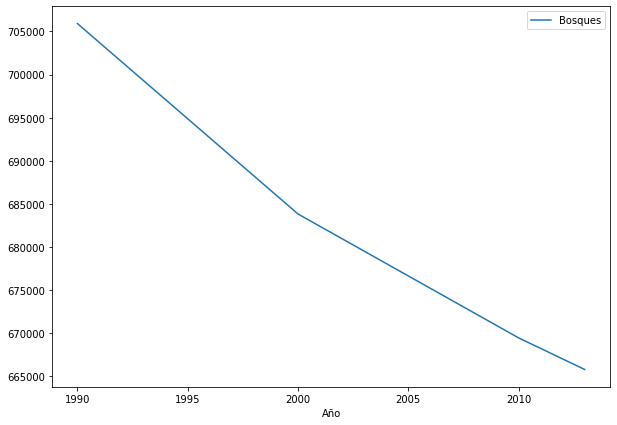

In [190]:
df_CalentamientoMexico.plot(x='Año', y='Bosques', figsize=(10,7))

## Conclusiones



*   Las gráficas anteriores muestran que temperatura ha ido en aumento a partir del 2010.
*   El crecimiento de la población, el aumento en la producción de CO2, el aumento en la producción de electricidad, la disminución del área de agricultura, y el paso del tiempo están estrechamente relacionadas entre sí y con aumento de la temperatura.
* Algunos países han reforestado mientras que otros han deforestado. A escala mundial, el área de bosques ha ido disminuyendo con el paso del tiempo.
* China es el mayor productor de CO2, pero también ha tomado acciones como la reforestación



El calentamiento global es un problema multifactorial que requiere la acción de los gobiernos, y a pesar de que algunos países han tomado acciones, no han sido suficientes para detener esta crisis.